In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
def analyze(G, plot=False):
    print(f"Number of nodes: {G.number_of_nodes()}")
    
    subgraphs = sorted(nx.connected_components(G), key=len, reverse=True)
    connected_components = [len(c) for c in subgraphs]  
    print(f"Number of components: {len(connected_components)}")
    print(f"Largest component: {connected_components[0]}")
    print(f"Sum of other components: {sum(connected_components[1:])}")
    
    if plot:
        S = G.subgraph(subgraphs[0]).copy()
        nx.draw(S, node_size=5, width=0.2)

In [3]:
social = nx.read_edgelist("../data/higgs-social_network.edgelist", nodetype=int)
analyze(social)

Number of nodes: 456626
Number of components: 156
Largest component: 456290
Sum of other components: 336


In [4]:
mention = nx.read_edgelist("../data/higgs-mention_network.edgelist", nodetype=int, data=(("weight", float),))
analyze(mention)

Number of nodes: 116408
Number of components: 10503
Largest component: 91606
Sum of other components: 24802


In [5]:
retweet = nx.read_edgelist("../data/higgs-retweet_network.edgelist", nodetype=int, data=(("weight", float),))
analyze(retweet)

Number of nodes: 256491
Number of components: 13199
Largest component: 223833
Sum of other components: 32658


In [6]:
reply = nx.read_edgelist("../data/higgs-reply_network.edgelist", nodetype=int, data=(("weight", float),))
analyze(reply)

Number of nodes: 38918
Number of components: 10641
Largest component: 12839
Sum of other components: 26079


In [7]:
G1 = nx.intersection(social, mention)
analyze(G1)

Number of nodes: 116408
Number of components: 63584
Largest component: 41278
Sum of other components: 75130


In [8]:
G2 = nx.intersection(social, retweet)
analyze(G2)

Number of nodes: 256491
Number of components: 119127
Largest component: 119495
Sum of other components: 136996


In [9]:
G3 = nx.intersection(social, reply)
analyze(G3)

Number of nodes: 38918
Number of components: 23732
Largest component: 6701
Sum of other components: 32217


Number of nodes: 21346
Number of components: 19654
Largest component: 588
Sum of other components: 20758


<IPython.core.display.Javascript object>


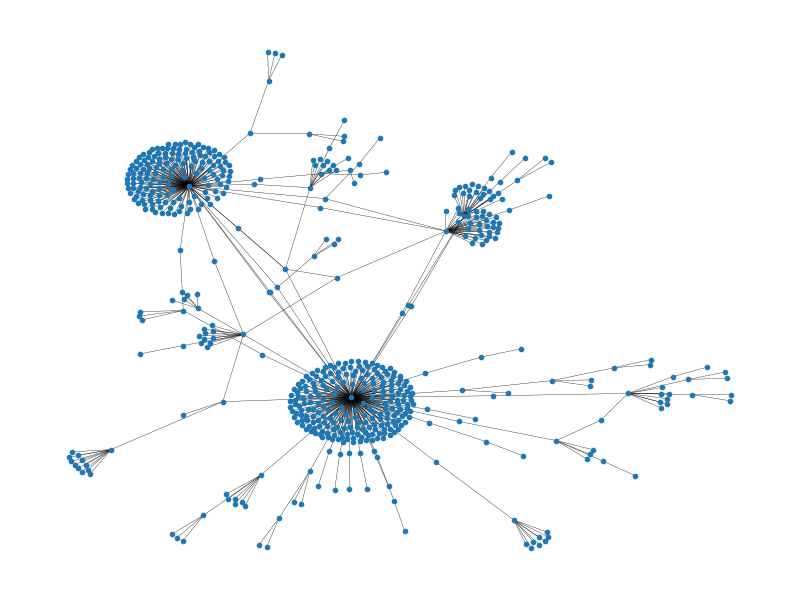

In [11]:
%matplotlib notebook
G4 = nx.intersection(social, nx.intersection(mention, nx.intersection(retweet, reply)))
analyze(G4, plot=True)